In [1]:
import sklearn.tree
import pandas
import numpy
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.metrics
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import sklearn.cluster
import sklearn.datasets

 # Importing and Cleaning Rent data 

In [2]:


rent = pandas.read_csv('/Users/nerenevaz/Downloads/FA13-2016-17.csv')
rent.dropna(inplace=True)
rent['DateLodgement'] = pandas.to_datetime(rent.DateLodgement,format='%m/%d/%Y')
rent['DateTenancyCommenced'] = pandas.to_datetime(rent.DateTenancyCommenced,format='%m/%d/%Y')
rent['BondAmount'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
rent['PremisesWeeklyRent'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
rent['BondAmount'] = rent['BondAmount'].convert_objects(convert_numeric=True)
rent['PremisesWeeklyRent'] = rent['PremisesWeeklyRent'].convert_objects(convert_numeric=True)
rent['DateLodgement'] = rent['DateLodgement'].apply(lambda x: x.strftime('%Y'))    
rent['DateTenancyCommenced'] = rent['DateTenancyCommenced'].apply(lambda x: x.strftime('%Y'))
rent['Premises_Postcode'] = rent['Premises_Postcode'].convert_objects(convert_numeric=True)
result = rent.groupby(['DateLodgement','Premises_Postcode','Premises_Suburb'], as_index=False).agg(
                      {'PremisesWeeklyRent':['mean']})
rent_mean = result.reset_index(drop=True)
##rent_mean = rent_mean[(rent_mean['Premises_Postcode'] >= 2000) & (rent_mean['Premises_Postcode'] <= 2250)]
rent_mean.Premises_Postcode = rent_mean.Premises_Postcode.round()
rent_mean.PremisesWeeklyRent = rent_mean.PremisesWeeklyRent.round()
rent_mean.head(5)

/Users/nerenevaz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/nerenevaz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/nerenevaz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


DateLodgement Premises_Postcode    Premises_Suburb PremisesWeeklyRent
                                                                   mean
0          2013            1335.0     POTTS POINT MC              875.0
1          2013            2000.0        DAWES POINT             1400.0
2          2013            2000.0          HAYMARKET              515.0
3          2013            2000.0      KING ST WHARF              800.0
4          2013            2000.0  KING STREET WHARF             1300.0

In [3]:
# Creating a Weekly mean rent by year from the Rent data

Weekly_Mean_Rent = rent_mean[['Premises_Postcode','DateLodgement','PremisesWeeklyRent']]
Weekly_Mean_Rent.columns = Weekly_Mean_Rent.columns.swaplevel(0, 1)
Weekly_Mean_Rent.sortlevel(1, axis=1, inplace=True)
Weekly_Mean_Rent.columns = Weekly_Mean_Rent.columns.droplevel(-1)
Weekly_Mean_Rent.columns = ['PremisesWeeklyRent','Premises_Postcode','DateLodgement']
Weekly_Mean_Rent
results = Weekly_Mean_Rent.groupby(['DateLodgement','Premises_Postcode'], as_index=False).agg(
                      {'PremisesWeeklyRent':['mean']})
results.columns = results.columns.swaplevel(0, 1)
results.sortlevel(1, axis=1, inplace=True)
results.columns = results.columns.droplevel(-1)
results.columns = ['PremisesWeeklyRent','Premises_Postcode','DateLodgement']
Weekly_Mean_Rent = results
Weekly_Mean_Rent = Weekly_Mean_Rent.pivot(index='Premises_Postcode', columns='DateLodgement', values='PremisesWeeklyRent')
Weekly_Mean_Rent.head(10)

/Users/nerenevaz/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:3312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  inplace=inplace, sort_remaining=sort_remaining)


DateLodgement         2013        2014     2015         2016
Premises_Postcode                                           
1335.0             875.000         NaN      NaN          NaN
1355.0                 NaN  300.000000   347.00   320.000000
1485.0                 NaN         NaN   530.00          NaN
1499.0                 NaN  430.000000      NaN          NaN
1680.0                 NaN         NaN   410.00          NaN
1790.0                 NaN  365.000000   335.00          NaN
1800.0                 NaN         NaN    89.00          NaN
1835.0                 NaN         NaN      NaN   350.000000
1871.0                 NaN         NaN   282.50          NaN
2000.0             986.125  944.428571  1231.25  1228.857143

# Importing Crime Statistics

In [4]:


police_stats = pandas.read_csv('/Users/nerenevaz/Downloads/PostcodeData2015.csv',index_col='Postcode')

# Cleaning the Crime data

In [5]:


Offences = police_stats[['Offence category','Jan 2013',
 'Feb 2013',
 'Mar 2013',
 'Apr 2013',
 'May 2013',
 'Jun 2013',
 'Jul 2013',
 'Aug 2013',
 'Sep 2013',
 'Oct 2013',
 'Nov 2013',
 'Dec 2013',
 'Jan 2014',
 'Feb 2014',
 'Mar 2014',
 'Apr 2014',
 'May 2014',
 'Jun 2014',
 'Jul 2014',
 'Aug 2014',
 'Sep 2014',
 'Oct 2014',
 'Nov 2014',
 'Dec 2014',
 'Jan 2015',
 'Feb 2015',
 'Mar 2015',
 'Apr 2015',
 'May 2015',
 'Jun 2015',
 'Jul 2015',
 'Aug 2015',
 'Sep 2015',
 'Oct 2015',
 'Nov 2015',
 'Dec 2015']]
Offences_2013 = Offences.filter(like = '2013')
Offences_2013['2013'] = Offences_2013.sum(axis=1)
Offences_2013 = Offences_2013[['2013']]
Offences_2014 = Offences.filter(like = '2014')
Offences_2014['2014'] = Offences_2014.sum(axis=1)
Offences_2014 = Offences_2014[['2014']]
Offences_2015 = Offences.filter(like = '2015')
Offences_2015['2015'] = Offences_2015.sum(axis=1)
Offences_2015 = Offences_2015[['2015']]
Offences1 = Offences[['Offence category']]
Offences1.reset_index()
Offences = pandas.concat([Offences1, Offences_2013, Offences_2014,Offences_2015], axis=1, join_axes=[Offences1.index])
Offences.reset_index()
Offence = Offences.reset_index(drop=False)
Crime = Offence.groupby(['Postcode', 'Offence category'], as_index=False).sum()
##Crime = Crime[(Crime['Postcode'] >= 2000) & (Crime['Postcode'] <= 2250)]
Crime.head(5)

Postcode             Offence category  2013  2014  2015
0      2000     Abduction and kidnapping     3     5     0
1      2000   Against justice procedures   900   760   727
2      2000                        Arson    10     4     8
3      2000                      Assault  1778  1603  1720
4      2000  Betting and gaming offences     0     2     0

In [6]:
Crime = Crime.pivot(index='Postcode', columns='Offence category')
Crime.head(5)

2013                                   \
Offence category Abduction and kidnapping Against justice procedures Arson   
Postcode                                                                     
2000                                  3.0                      900.0  10.0   
2006                                  0.0                       17.0   0.0   
2007                                  0.0                       11.0   5.0   
2008                                  0.0                       17.0   5.0   
2009                                  0.0                       25.0   0.0   

                                                                              \
Offence category Assault Betting and gaming offences Blackmail and extortion   
Postcode                                                                       
2000              1778.0                         0.0                     3.0   
2006                29.0                         NaN                     1.0   
2007                67.0                         0.0                     0.0   
2008                89.0                         0.0                     1.0   
2009               162.0                        16.0                     0.0   

                                                   \
Offence category Disorderly conduct Drug offences   
Postcode                                            
2000                          975.0        1841.0   
2006                           10.0          21.0   
2007                           22.0          53.0   
2008                           33.0          52.0   
2009                           32.0         200.0   

                                                                         \
Offence category Harassment, threatening behaviour and private nuisance   
Postcode                                                                  
2000                                                          296.0       
2006                                                            9.0       
2007                                                           18.0       
2008                                                           16.0       
2009                                                           35.0       

                                       ...               \
Offence category Homicide              ...                
Postcode                               ...                
2000                  2.0              ...                
2006                  0.0              ...                
2007                  0.0              ...                
2008                  0.0              ...                
2009                  0.0              ...                

                                         2015                 \
Offence category Malicious damage to property Other offences   
Postcode                                                       
2000                                    647.0          704.0   
2006                                     28.0            4.0   
2007                                     47.0           22.0   
2008                                     79.0           10.0   
2009                                     87.0           88.0   

                                                                         \
Offence category Other offences against the person Pornography offences   
Postcode                                                                  
2000                                          17.0                  4.0   
2006                                           1.0                  0.0   
2007                                           1.0                  0.0   
2008                                           0.0                  0.0   
2009                                           3.0                  0.0   

                                                            \
Offence category Prohibited and regulated weapons offences   
Postcode                          

In [7]:
Rent_Crime = pandas.concat([Crime, Weekly_Mean_Rent], axis=1, join_axes=[Crime.index])
Rent_Crime.reset_index(inplace=True)

In [8]:

Rent_Crime.fillna(Rent_Crime.mean(),inplace=True)
Rent_Crime.sample()

Postcode  (2013, Abduction and kidnapping)  \
17      2025                               0.0   

    (2013, Against justice procedures)  (2013, Arson)  (2013, Assault)  \
17                                 6.0            0.0             20.0   

    (2013, Betting and gaming offences)  (2013, Blackmail and extortion)  \
17                                  0.0                              0.0   

    (2013, Disorderly conduct)  (2013, Drug offences)  \
17                        13.0                   19.0   

    (2013, Harassment, threatening behaviour and private nuisance)  ...    \
17                                               11.0               ...     

    (2015, Prohibited and regulated weapons offences)  \
17                                                4.0   

    (2015, Prostitution offences)  (2015, Robbery)  (2015, Sexual offences)  \
17                       0.589372              0.0                      6.0   

    (2015, Theft)  (2015, Transport regulatory offences)        2013  \
17          146.0                                    0.0  699.666667   

          2014        2015   2016  
17  793.666667  907.333333  751.5  

[1 rows x 68 columns]

In [9]:
Rent_Crime.describe()

Postcode  (2013, Abduction and kidnapping)  \
count   612.000000                        612.000000   
mean   2426.003268                          0.528000   
std     281.894299                          0.862577   
min    2000.000000                          0.000000   
25%    2175.750000                          0.000000   
50%    2405.500000                          0.000000   
75%    2650.250000                          1.000000   
max    4383.000000                          9.000000   

       (2013, Against justice procedures)  (2013, Arson)  (2013, Assault)  \
count                          612.000000     612.000000       612.000000   
mean                            87.618658      11.326733       105.625205   
std                            189.538151      19.817469       172.105262   
min                              0.000000       0.000000         0.000000   
25%                              5.000000       1.000000        15.000000   
50%                             20.000000       4.000000        47.000000   
75%                             68.250000      11.326733       126.250000   
max                           1936.000000     168.000000      1778.000000   

       (2013, Betting and gaming offences)  (2013, Blackmail and extortion)  \
count                            612.00000                       612.000000   
mean                               0.27439                         0.295082   
std                                0.86134                         0.593807   
min                                0.00000                         0.000000   
25%                                0.00000                         0.000000   
50%                                0.27439                         0.295082   
75%                                0.27439                         0.295082   
max                               16.00000                        10.000000   

       (2013, Disorderly conduct)  (2013, Drug offences)  \
count                  612.000000             612.000000   
mean                    36.895082              73.388525   
std                     78.172176             158.776412   
min                      0.000000               0.000000   
25%                      5.000000               6.000000   
50%                     13.000000              25.000000   
75%                     36.223770              76.000000   
max                    975.000000            1841.000000   

       (2013, Harassment, threatening behaviour and private nuisance)  \
count                                         612.000000                
mean                                           48.130719                
std                                            76.247825                
min                                             0.000000                
25%                                             8.000000                
50%                                            21.000000                
75%                                            57.000000                
max                                           665.000000                

          ...       (2015, Prohibited and regulated weapons offences)  \
count     ...                                              612.000000   
mean      ...                                               19.045827   
std       ...                                               30.244198   
min       ...                                                0.000000   
25%       ...                                                3.000000   
50%       ...                                                9.000000   
75%       ...                                               22.000000   
max       ...                                              243.000000   

       (2015, Prostitution offences)  (2015, Robbery)  \
count                     612.000000       612.000000   
mean                        0.589372         4.862319   
std                         3.772173         9.985385   
min           

# Exporting file to clean column headers in excel and then reimporting it 

In [10]:
Rent_Crime.to_csv('/Users/nerenevaz/Downloads/Rent_Crime.csv')

In [11]:

Rent_vs_Crime = pandas.read_csv('/Users/nerenevaz/Downloads/Rent_Crime_clean.csv')

In [12]:
Rent_vs_Crime = Rent_vs_Crime.round()
Rent_vs_Crime.dropna(inplace=True)
Rent_vs_Crime.sample(25)

Postcode  Crime_2013_Abduction and kidnapping  \
200      2260                                    0   
489      2739                                    1   
240      2320                                    1   
44       2062                                    0   
483      2732                                    0   
339      2474                                    0   
157      2195                                    1   
464      2705                                    0   
265      2350                                    0   
526      2791                                    1   
491      2747                                    0   
56       2074                                    2   
583      4383                                    1   
395      2566                                    1   
517      2779                                    1   
237      2317                                    0   
529      2794                                    0   
454      2669                                    0   
155      2193                                    0   
238      2318                                    0   
190      2231                                    0   
513      2775                                    0   
331      2464                                    0   
28       2036                                    0   
47       2065                                    0   

     Crime_2013_Against justice procedures  Crime_2013_Arson  \
200                                     51                 8   
489                                     13                 1   
240                                    390                72   
44                                      11                 0   
483                                      7                 0   
339                                     17                 6   
157                                     53                20   
464                                     86                 5   
265                                    203                62   
526                                      0                 1   
491                                    171                49   
56                                       7                 7   
583                                      0                 1   
395                                     63                41   
517                                      5                 1   
237                                     19                 6   
529                                    101                26   
454                                      5                 6   
155                                     27                 5   
238                                     27                59   
190                                      8                 5   
513                                      2                 1   
331                                     48                 3   
28                                     104                11   
47                                      52                 2   

     Crime_2013_Assault  Crime_2013_Betting and gaming offences  \
200                 153                                       0   
489                  21                                       0   
240                 373                                       0   
44                   27                                       0   
483                  10                                       0   
339                  57                                       0   
157                 209                                       0   
464                 127                                       0   
265                 382                                       0   
526                   0                                       0   
491                 443                                       1   
56                   26                                       0   
583                   2                                       0 

In [13]:
Rent_vs_Crime.describe()

Postcode  Crime_2013_Abduction and kidnapping  \
count   583.000000                           583.000000   
mean   2420.070326                             0.610635   
std     277.630500                             0.897318   
min    2000.000000                             0.000000   
25%    2174.000000                             0.000000   
50%    2403.000000                             0.000000   
75%    2644.500000                             1.000000   
max    4383.000000                             9.000000   

       Crime_2013_Against justice procedures  Crime_2013_Arson  \
count                             583.000000        583.000000   
mean                               91.638079         11.698113   
std                               193.287140         20.142144   
min                                 0.000000          0.000000   
25%                                 6.000000          1.000000   
50%                                22.000000          5.000000   
75%                                72.500000         12.000000   
max                              1936.000000        168.000000   

       Crime_2013_Assault  Crime_2013_Betting and gaming offences  \
count          583.000000                              583.000000   
mean           109.828473                                0.154374   
std            175.074745                                0.892991   
min              0.000000                                0.000000   
25%             17.000000                                0.000000   
50%             50.000000                                0.000000   
75%            131.000000                                0.000000   
max           1778.000000                               16.000000   

       Crime_2013_Blackmail and extortion  Crime_2013_Disorderly conduct  \
count                          583.000000                     583.000000   
mean                             0.154374                      38.336192   
std                              0.626047                      79.778108   
min                              0.000000                       0.000000   
25%                              0.000000                       5.000000   
50%                              0.000000                      14.000000   
75%                              0.000000                      37.500000   
max                             10.000000                     975.000000   

       Crime_2013_Drug offences  \
count                583.000000   
mean                  75.794168   
std                  161.943922   
min                    0.000000   
25%                    7.000000   
50%                   27.000000   
75%                   78.000000   
max                 1841.000000   

       Crime_2013_Harassment, threatening behaviour and private nuisance  \
count                                         583.000000                   
mean                                           50.190395                   
std                                            77.470689                   
min                                             0.000000                   
25%                                             9.000000                   
50%                                            22.000000                   
75%                                            59.000000                   
max                                           665.000000                   

          ...      Crime_2015_Prostitution offences  Crime_2015_Robbery  \
count     ...                            583.000000          583.000000   
mean      ...                              0.859348            4.969125   
std       ...                              3.869536           10.176572   
min       ...                              0.000000            0.000000   
25%       ...                              0.000000            0.000000   
50%       ...                              1.000000            2.000000   
75%       ...                              1.00000

In [14]:
Rent_vs_Crime.columns.unique()

array(['Postcode', 'Crime_2013_Abduction and kidnapping',
       'Crime_2013_Against justice procedures', 'Crime_2013_Arson',
       'Crime_2013_Assault', 'Crime_2013_Betting and gaming offences',
       'Crime_2013_Blackmail and extortion',
       'Crime_2013_Disorderly conduct', 'Crime_2013_Drug offences',
       'Crime_2013_Harassment, threatening behaviour and private nuisance',
       'Crime_2013_Homicide', 'Crime_2013_Liquor offences',
       'Crime_2013_Malicious damage to property',
       'Crime_2013_Other offences',
       'Crime_2013_Other offences against the person',
       'Crime_2013_Pornography offences',
       'Crime_2013_Prohibited and regulated weapons offences',
       'Crime_2013_Prostitution offences', 'Crime_2013_Robbery',
       'Crime_2013_Sexual offences', 'Crime_2013_Theft',
       'Crime_2013_Transport regulatory offences',
       'Crime_2014_Abduction and kidnapping',
       'Crime_2014_Against justice procedures', 'Crime_2014_Arson',
       'Crime_2014_As

# Plotting Rent vs Postcode data

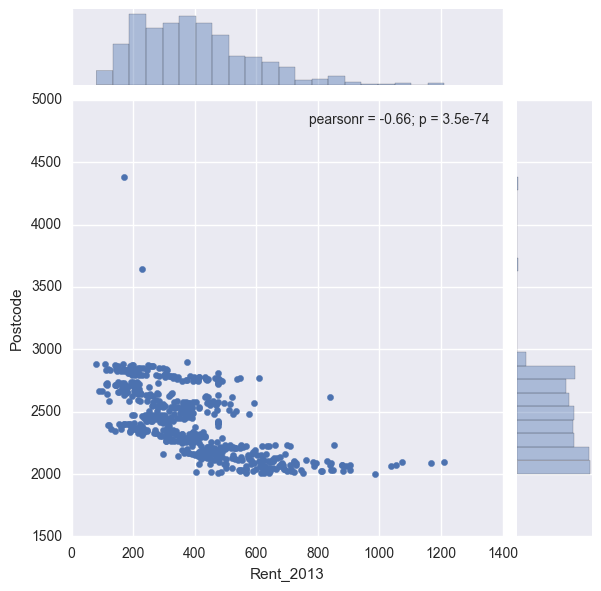

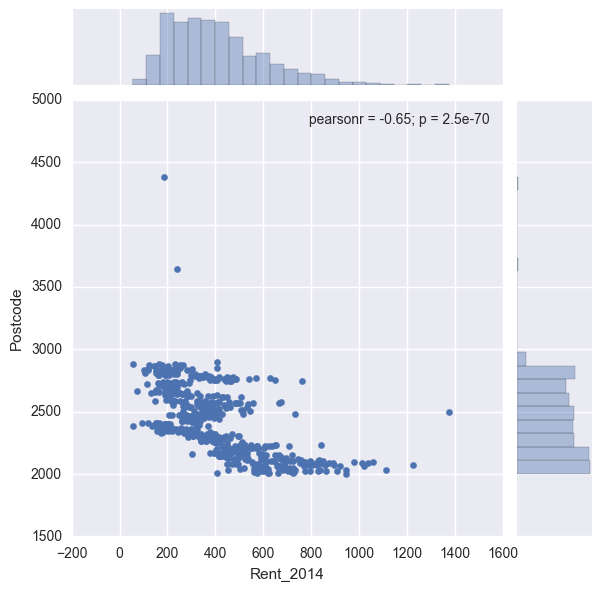

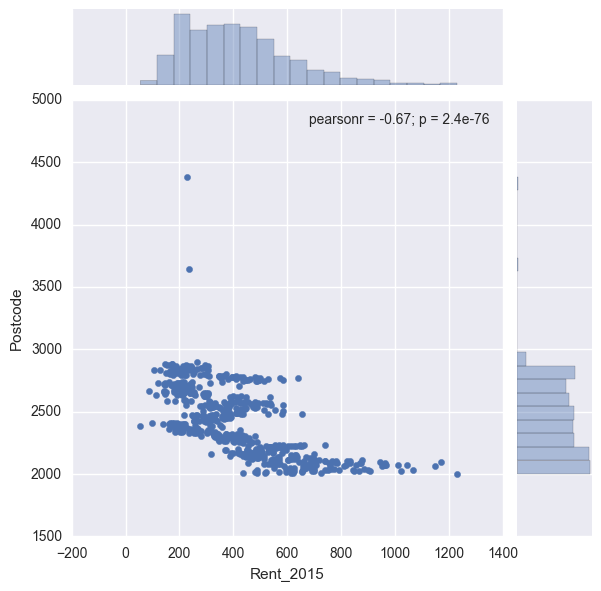

In [15]:
seaborn.jointplot(x='Rent_2013', y='Postcode', data=Rent_vs_Crime)
seaborn.jointplot(x='Rent_2014', y='Postcode', data=Rent_vs_Crime)
seaborn.jointplot(x='Rent_2015', y='Postcode', data=Rent_vs_Crime)

In [16]:
Rent_vs_Crime.set_index('Postcode',inplace=True)
Rent_vs_Crime.describe()

Crime_2013_Abduction and kidnapping  \
count                           583.000000   
mean                              0.610635   
std                               0.897318   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               1.000000   
max                               9.000000   

       Crime_2013_Against justice procedures  Crime_2013_Arson  \
count                             583.000000        583.000000   
mean                               91.638079         11.698113   
std                               193.287140         20.142144   
min                                 0.000000          0.000000   
25%                                 6.000000          1.000000   
50%                                22.000000          5.000000   
75%                                72.500000         12.000000   
max                              1936.000000        168.000000   

       Crime_2013_Assault  Crime_2013_Betting and gaming offences  \
count          583.000000                              583.000000   
mean           109.828473                                0.154374   
std            175.074745                                0.892991   
min              0.000000                                0.000000   
25%             17.000000                                0.000000   
50%             50.000000                                0.000000   
75%            131.000000                                0.000000   
max           1778.000000                               16.000000   

       Crime_2013_Blackmail and extortion  Crime_2013_Disorderly conduct  \
count                          583.000000                     583.000000   
mean                             0.154374                      38.336192   
std                              0.626047                      79.778108   
min                              0.000000                       0.000000   
25%                              0.000000                       5.000000   
50%                              0.000000                      14.000000   
75%                              0.000000                      37.500000   
max                             10.000000                     975.000000   

       Crime_2013_Drug offences  \
count                583.000000   
mean                  75.794168   
std                  161.943922   
min                    0.000000   
25%                    7.000000   
50%                   27.000000   
75%                   78.000000   
max                 1841.000000   

       Crime_2013_Harassment, threatening behaviour and private nuisance  \
count                                         583.000000                   
mean                                           50.190395                   
std                                            77.470689                   
min                                             0.000000                   
25%                                             9.000000                   
50%                                            22.000000                   
75%                                            59.000000                   
max                                           665.000000                   

       Crime_2013_Homicide     ...      Crime_2015_Prostitution offences  \
count           583.000000     ...                            583.000000   
mean              0.226415     ...                              0.859348   
std               0.586376     ...                              3.869536   
min               0.000000     ...                              0.000000   
25%               0.000000     ...                              0.000000   
50%               0.000000     ...                              1.000000   
75%               0.000000     ...                              1.000000   
max               5.000000     ...                             92.000000   

    

# Splitting Data into 2014 , 2015

In [17]:
lat_lon = Rent_vs_Crime[["lat","lon"]]
lat_lon.sample()

lat    lon
Postcode             
2135     -34.0  151.0

In [18]:
Rent_vs_Crime2015 = Rent_vs_Crime.filter(regex=("2015"))
Rent_vs_Crime2015 = pandas.concat([Rent_vs_Crime2015, lat_lon], axis=1, join_axes=[lat_lon.index])
Rent_vs_Crime2015.describe()

Crime_2015_Abduction and kidnapping  \
count                           583.000000   
mean                              0.590051   
std                               0.942526   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               1.000000   
max                               6.000000   

       Crime_2015_Against justice procedures  Crime_2015_Arson  \
count                             583.000000        583.000000   
mean                              100.535163          8.533448   
std                               212.175457         14.517622   
min                                 0.000000          0.000000   
25%                                 6.000000          1.000000   
50%                                25.000000          3.000000   
75%                                85.500000          9.000000   
max                              2432.000000        123.000000   

       Crime_2015_Assault  Crime_2015_Betting and gaming offences  \
count          583.000000                              583.000000   
mean           104.166381                                0.106346   
std            162.460489                                0.874816   
min              0.000000                                0.000000   
25%             15.000000                                0.000000   
50%             48.000000                                0.000000   
75%            129.000000                                0.000000   
max           1720.000000                               18.000000   

       Crime_2015_Blackmail and extortion  Crime_2015_Disorderly conduct  \
count                          583.000000                     583.000000   
mean                             0.226415                      36.792453   
std                              0.683775                      65.232072   
min                              0.000000                       0.000000   
25%                              0.000000                       5.000000   
50%                              0.000000                      16.000000   
75%                              0.000000                      38.000000   
max                              9.000000                     802.000000   

       Crime_2015_Drug offences  \
count                583.000000   
mean                  97.578045   
std                  197.695435   
min                    0.000000   
25%                    8.000000   
50%                   35.000000   
75%                   98.000000   
max                 2345.000000   

       Crime_2015_Harassment, threatening behaviour and private nuisance  \
count                                         583.000000                   
mean                                           51.195540                   
std                                            77.508715                   
min                                             0.000000                   
25%                                             8.000000                   
50%                                            24.000000                   
75%                                            62.500000                   
max                                           680.000000                   

       Crime_2015_Homicide     ...      Crime_2015_Pornography offences  \
count           583.000000     ...                           583.000000   
mean              0.174957     ...                             1.149228   
std               0.559446     ...                             1.709091   
min               0.000000     ...                             0.000000   
25%               0.000000     ...                             0.000000   
50%               0.000000     ...                             1.000000   
75%               0.000000     ...                             1.000000   
max               7.000000     ...                            13.000000   

       Crime_

In [19]:
Rent_vs_Crime2014 = Rent_vs_Crime.filter(regex=("2014"))
Rent_vs_Crime2014 = pandas.concat([Rent_vs_Crime2014, lat_lon], axis=1, join_axes=[lat_lon.index])
Rent_vs_Crime2014.describe()

Crime_2014_Abduction and kidnapping  \
count                           583.000000   
mean                              0.650086   
std                               1.162573   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               1.000000   
max                              10.000000   

       Crime_2014_Against justice procedures  Crime_2014_Arson  \
count                             583.000000        583.000000   
mean                               91.639794          9.595197   
std                               189.074379         17.689886   
min                                 0.000000          0.000000   
25%                                 6.000000          1.000000   
50%                                22.000000          4.000000   
75%                                76.500000         10.000000   
max                              1830.000000        173.000000   

       Crime_2014_Assault  Crime_2014_Betting and gaming offences  \
count          583.000000                              583.000000   
mean           106.653516                                0.195540   
std            166.050121                                1.349372   
min              0.000000                                0.000000   
25%             17.000000                                0.000000   
50%             50.000000                                0.000000   
75%            129.500000                                0.000000   
max           1603.000000                               29.000000   

       Crime_2014_Blackmail and extortion  Crime_2014_Disorderly conduct  \
count                          583.000000                     583.000000   
mean                             0.181818                      36.938250   
std                              0.584342                      70.080511   
min                              0.000000                       0.000000   
25%                              0.000000                       5.000000   
50%                              0.000000                      14.000000   
75%                              0.000000                      39.000000   
max                              6.000000                     846.000000   

       Crime_2014_Drug offences  \
count                583.000000   
mean                  87.519726   
std                  179.471693   
min                    0.000000   
25%                    8.000000   
50%                   34.000000   
75%                   88.000000   
max                 2023.000000   

       Crime_2014_Harassment, threatening behaviour and private nuisance  \
count                                         583.000000                   
mean                                           50.380789                   
std                                            78.118087                   
min                                             0.000000                   
25%                                             9.000000                   
50%                                            22.000000                   
75%                                            59.000000                   
max                                           709.000000                   

       Crime_2014_Homicide     ...      Crime_2014_Pornography offences  \
count           583.000000     ...                           583.000000   
mean              0.192110     ...                             1.060034   
std               0.553781     ...                             1.469565   
min               0.000000     ...                             0.000000   
25%               0.000000     ...                             0.000000   
50%               0.000000     ...                             1.000000   
75%               0.000000     ...                             1.000000   
max               4.000000     ...                            11.000000   

       Crime_

# Finding Clusters

In [20]:
from sklearn import preprocessing
rscaler = preprocessing.RobustScaler()
x_scaled = rscaler.fit_transform(Rent_vs_Crime2015)
df_normalized = pandas.DataFrame(x_scaled)

In [21]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10] # which of these is best?
X = df_normalized

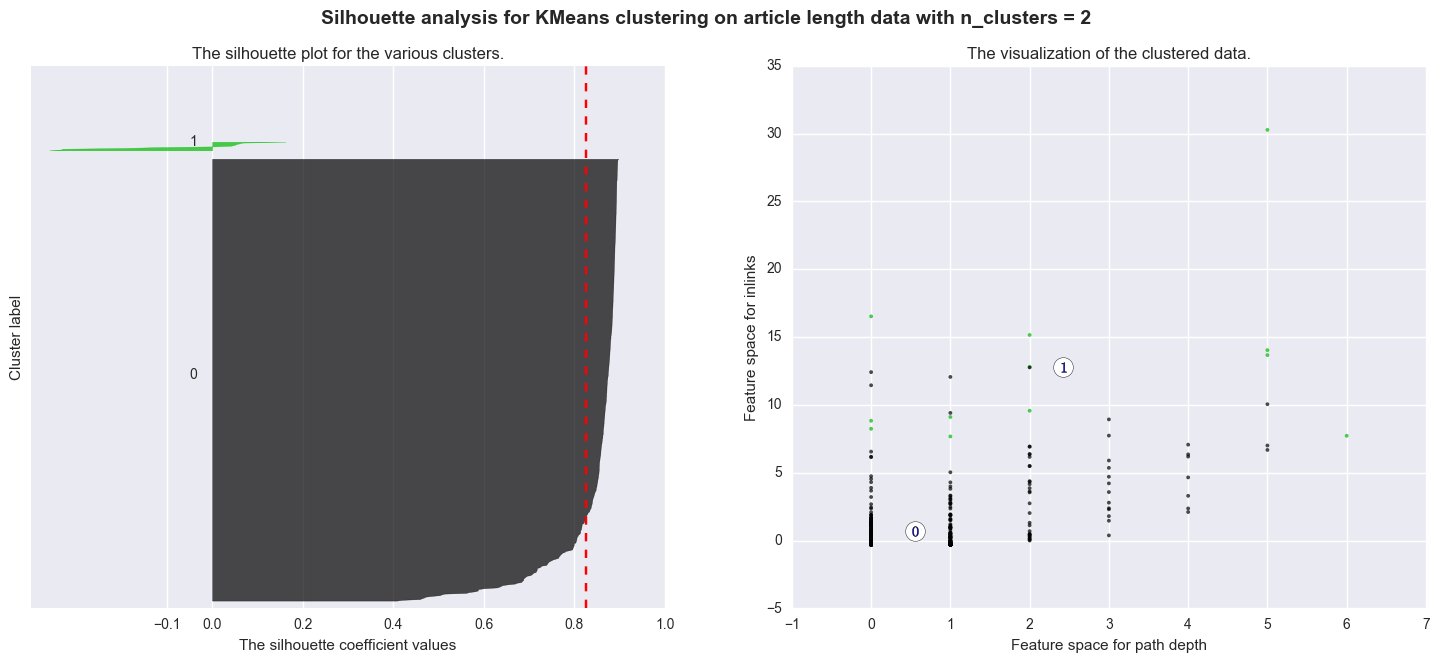

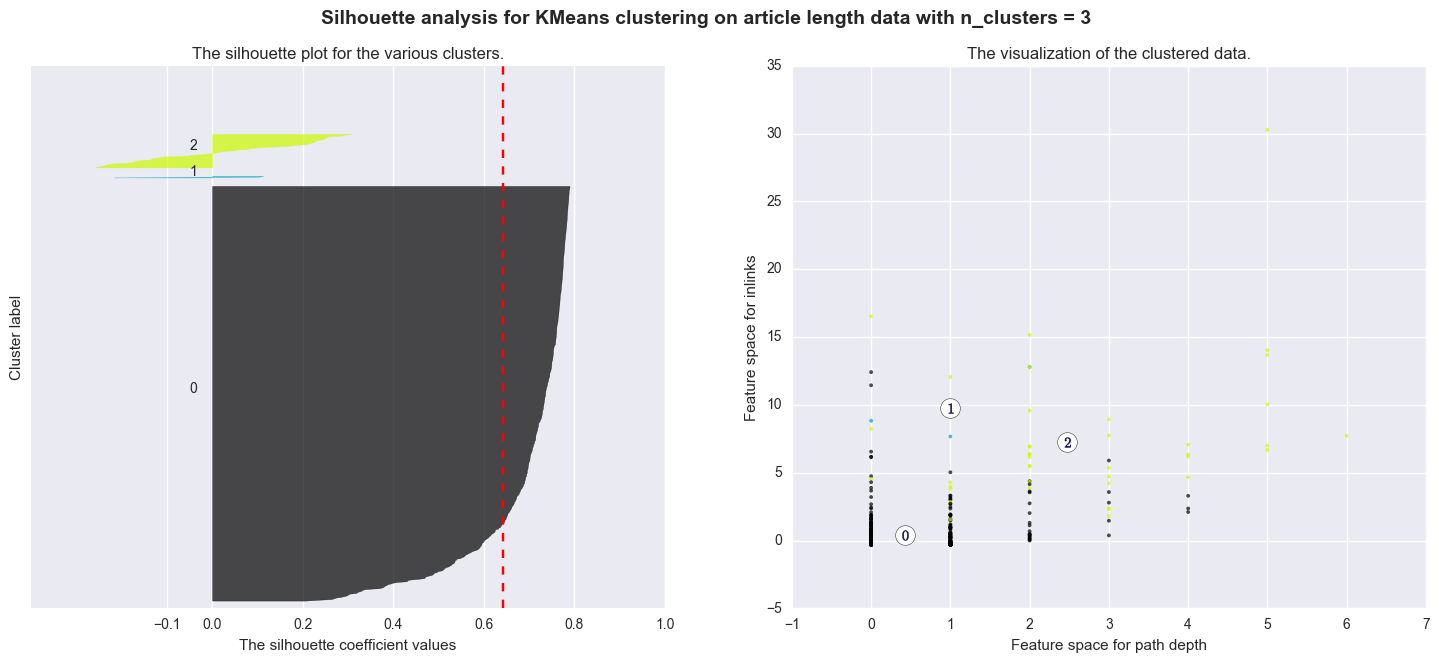

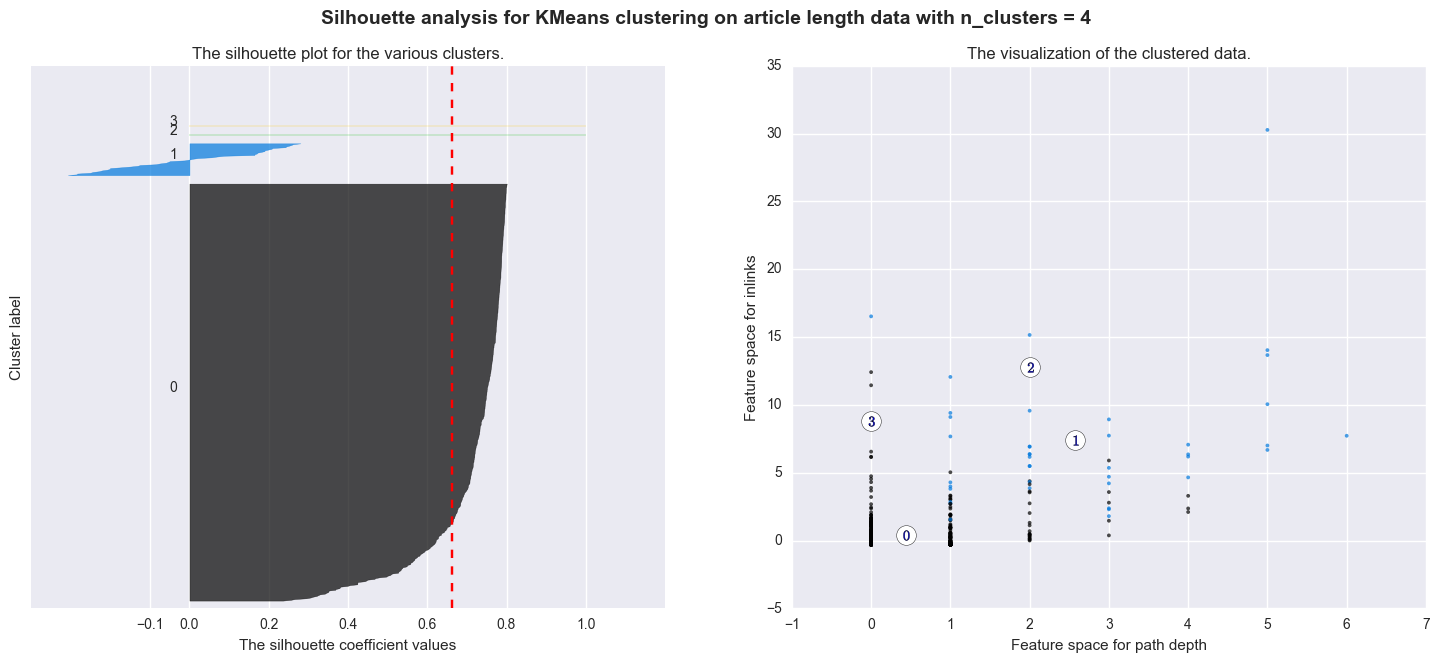

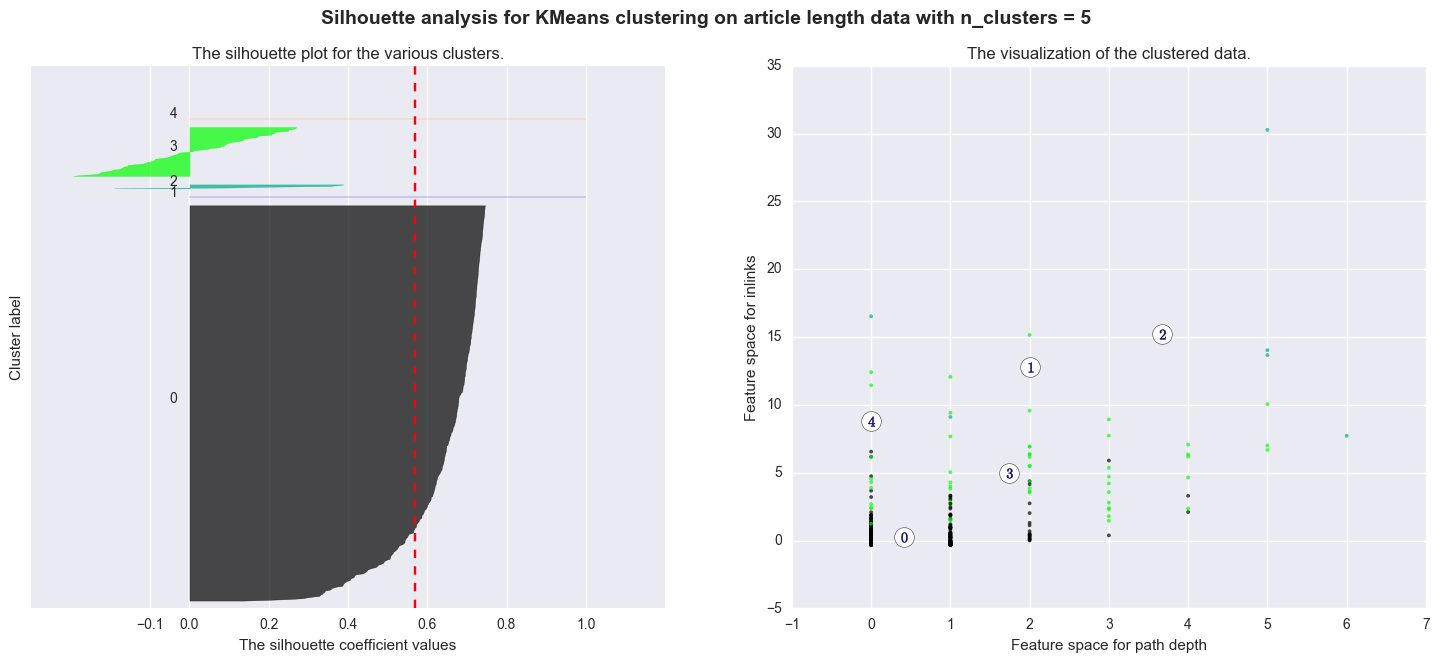

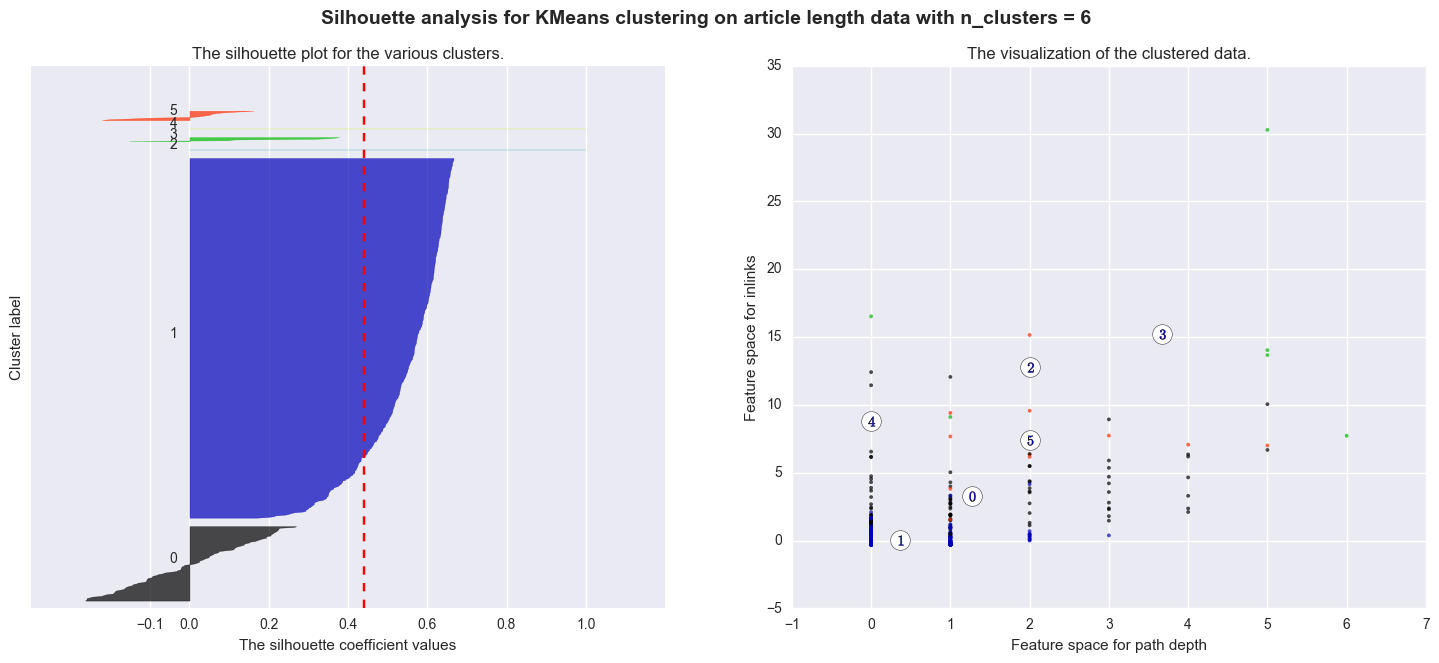

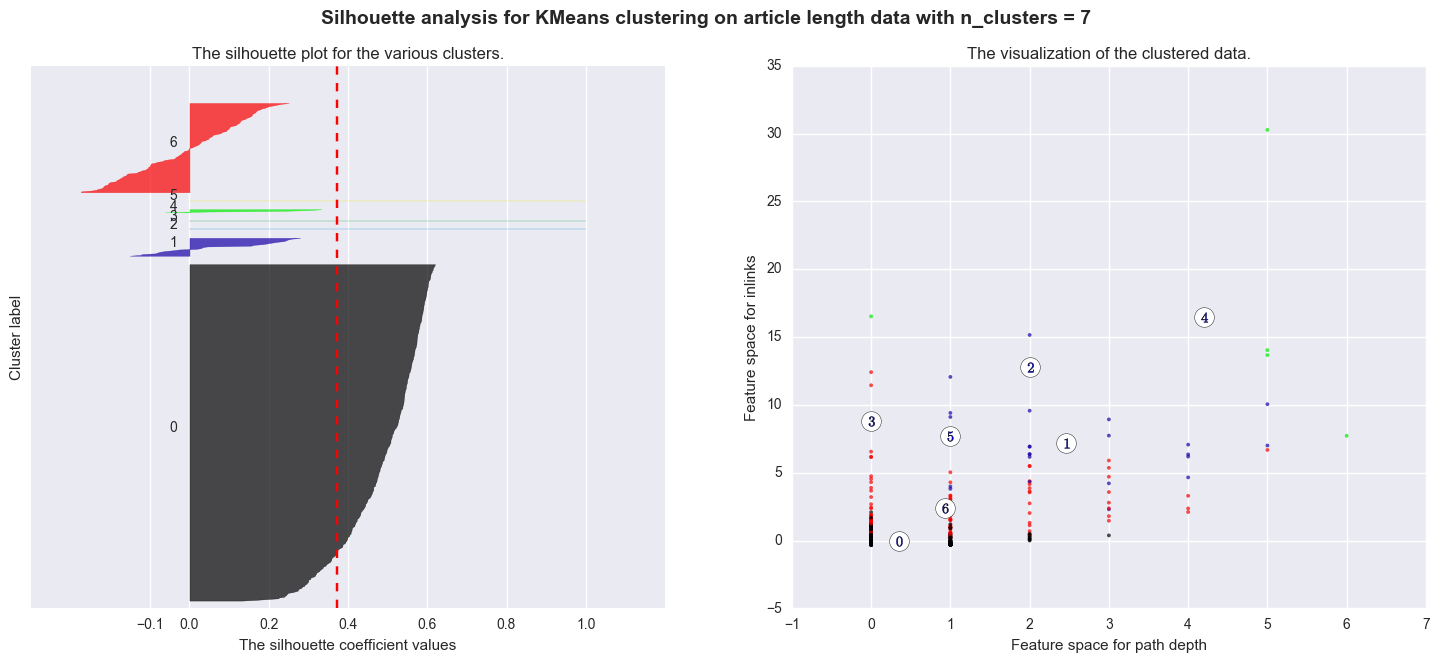

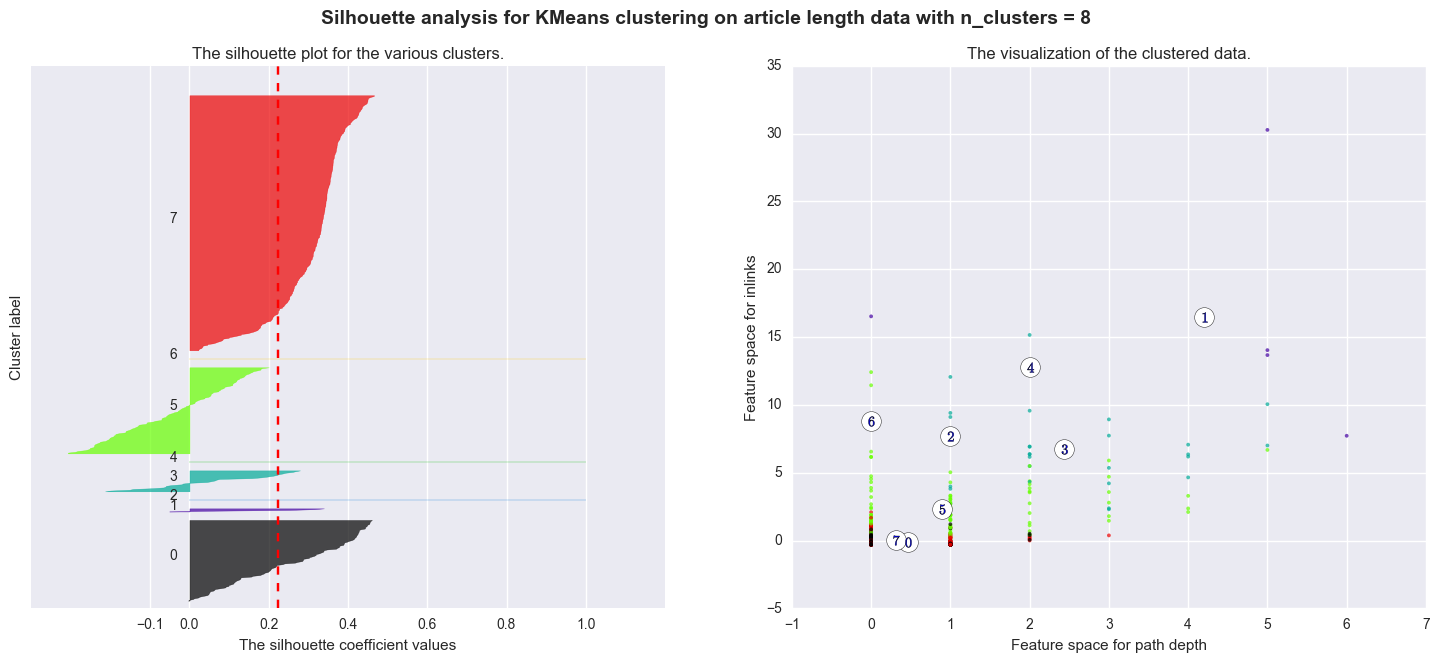

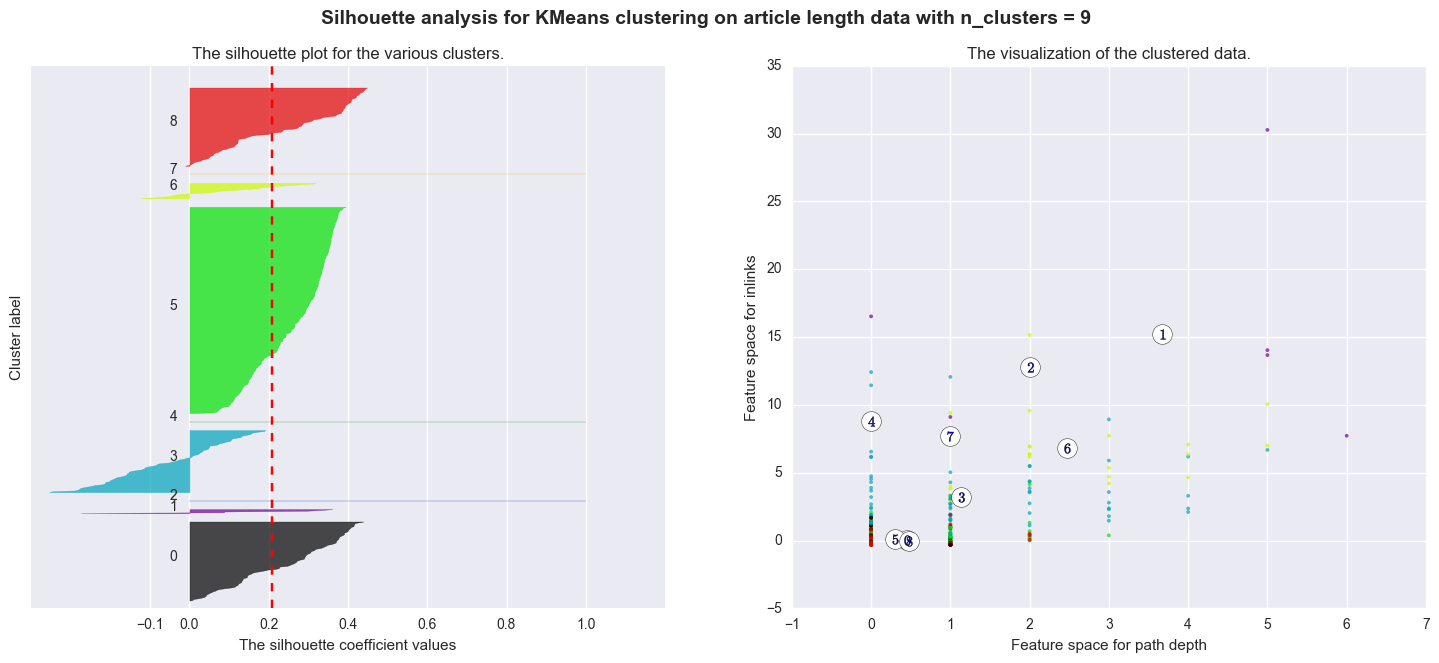

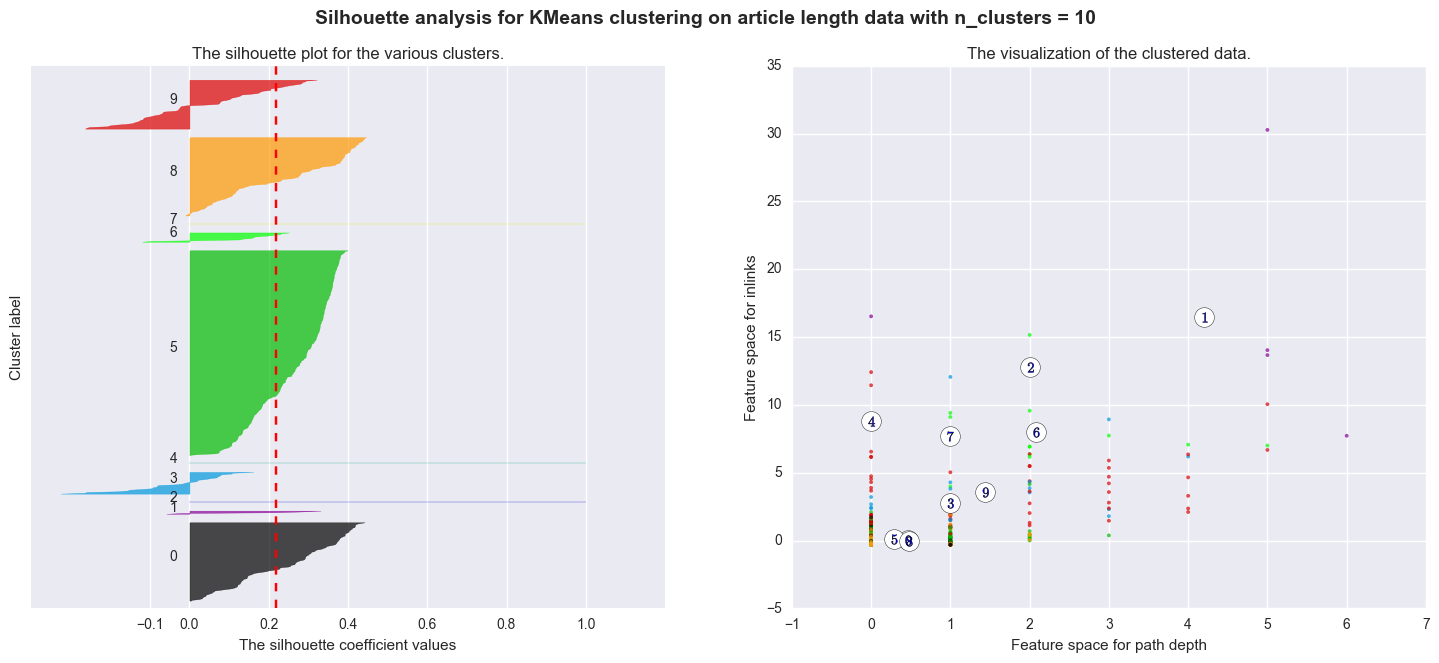

In [22]:
clust_array = []
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = sklearn.metrics.silhouette_score(X, cluster_labels)
    clust_array.append({'cnum':n_clusters,'centers':clusterer.cluster_centers_,'labels':cluster_labels,'silscore':silhouette_avg})
    sample_silhouette_values = sklearn.metrics.silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(numpy.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples       
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[0], X[1], marker='.', s=30, lw=0, alpha=0.7,
    #ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)
    # Labeling the clusters
    centers = clusterer.cluster_centers_  
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for path depth")
        ax2.set_ylabel("Feature space for inlinks")
        plt.suptitle(("Silhouette analysis for KMeans clustering on article length data "
                  "with n_clusters = %d" % n_clusters % silhouette_avg),
                 fontsize=14, fontweight='bold')
        filnum = str(n_clusters)
        plt.savefig('ALL_ClusterTests_Clust_No-'+filnum+'.png')
    plt.show()

In [23]:
sildf = pandas.DataFrame(clust_array)
sildf

centers  cnum  \
0  [[0.551663747811, 0.701076121557, 0.5829684763...     2   
1  [[0.432835820896, 0.379752182484, 0.3453824626...     3   
2  [[0.43413729128, 0.412410590308, 0.36108534322...     4   
3  [[0.409001956947, 0.234956737929, 0.2920743639...     5   
4  [[1.27835051546, 3.31375218829, 2.07345360825,...     6   
5  [[0.351724137931, -0.0154702522952, 0.09942528...     7   
6  [[0.466666666667, -0.083258460617, -0.08571428...     8   
7  [[0.456310679612, 0.017829883373, 0.1674757281...     9   
8  [[0.460784313725, 0.00715254655321, 0.16421568...    10   

                                              labels  silscore  
0  [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...  0.826595  
1  [1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, ...  0.642191  
2  [3, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...  0.661680  
3  [4, 0, 0, 0, 3, 1, 3, 0, 3, 3, 0, 0, 0, 3, 3, ...  0.569055  
4  [4, 1, 1, 1, 0, 2, 5, 1, 0, 0, 1, 1, 1, 0, 0, ...  0.439782  
5  [3, 0, 0, 0, 6, 2, 5, 0, 1, 6, 0, 0, 0, 6, 6, ...  0.373391  
6  [6, 7, 7, 7, 5, 4, 2, 7, 3, 5, 7, 7, 7, 5, 5, ...  0.224115  
7  [4, 5, 5, 5, 3, 2, 7, 5, 3, 3, 5, 5, 5, 3, 3, ...  0.209193  
8  [4, 5, 5, 5, 3, 2, 7, 5, 3, 9, 5, 5, 5, 3, 3, ...  0.218550

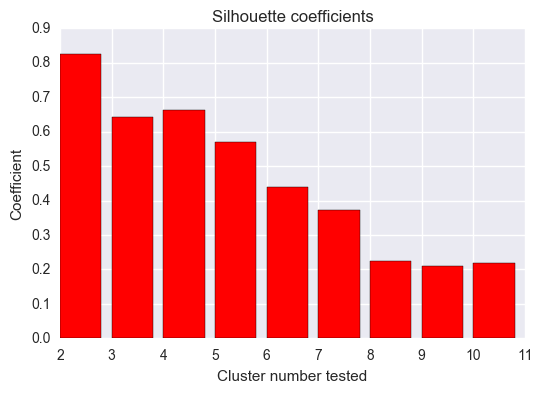

In [24]:

sil1 = range_n_clusters
sil2 = sildf['silscore']
plt.bar(sil1, sil2, color='red')
plt.title('Silhouette coefficients')
plt.xlabel('Cluster number tested')
plt.ylabel('Coefficient')
plt.show()

In [25]:
import sklearn.metrics


In [26]:
clusterer = sklearn.cluster.KMeans(n_clusters=2)


In [27]:
cluster_suggestions = clusterer.fit_predict(Rent_vs_Crime2015)
cluster_suggestions

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [28]:
import sklearn.metrics


In [29]:
sklearn.metrics.silhouette_score(Rent_vs_Crime2015, cluster_suggestions)

0.8338551737125719

In [30]:

x = Rent_vs_Crime2015['lat']
y = Rent_vs_Crime2015['lon']

In [31]:
import numpy
colouring = numpy.array(['red', 'black'])

In [32]:
colour_by_cluster = colouring[cluster_suggestions]


In [ ]:
plt.scatter(x,y, color=colour_by_cluster,s=3)



In [34]:
clusterer1 = sklearn.cluster.KMeans(n_clusters=5)

In [35]:
cluster_suggestions1 = clusterer1.fit_predict(Rent_vs_Crime2015)
cluster_suggestions1

array([2, 0, 4, 4, 4, 3, 3, 4, 3, 4, 4, 0, 4, 4, 3, 0, 0, 0, 4, 0, 0, 0, 0,
       4, 4, 0, 4, 4, 4, 4, 0, 0, 4, 4, 3, 0, 4, 0, 4, 0, 0, 0, 4, 0, 0, 0,
       0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       4, 0, 0, 0, 0, 0, 4, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4,
       4, 0, 0, 4, 4, 0, 4, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4, 1, 0, 4, 4, 4,
       1, 1, 0, 4, 3, 0, 1, 2, 1, 4, 0, 4, 4, 4, 0, 0, 0, 0, 3, 4, 4, 4, 4,
       3, 1, 4, 3, 2, 4, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 4, 4, 4, 4, 0, 0, 4,
       1, 0, 4, 1, 0, 4, 0, 0, 4, 0, 4, 0, 0, 4, 4, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 4, 4, 4, 0, 1, 0, 0, 1, 0, 4, 4, 0, 1, 4, 3, 4, 4, 4, 0, 0, 0,
       4, 0, 0, 4, 0, 4, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 1, 4, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 4, 4, 4, 3, 0, 0, 0, 0, 4, 4, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [36]:
sklearn.metrics.silhouette_score(Rent_vs_Crime2015, cluster_suggestions1)

0.44187179116155018

In [37]:
import numpy
colouring1 = numpy.array(['purple', 'pink', 'blue', 'orange', 'green'])

In [39]:
colour_by_clusterA = colouring1[cluster_suggestions1]


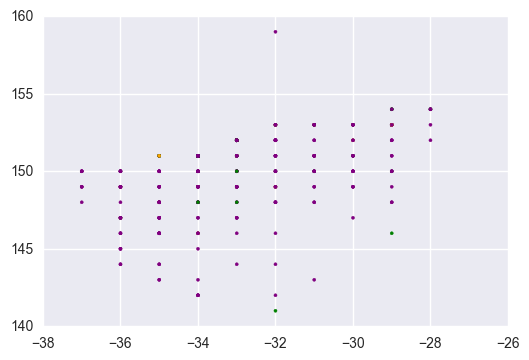

In [43]:
plt.scatter(x,y, color=colour_by_clusterA,s=5)



# Finding Correlation of Features

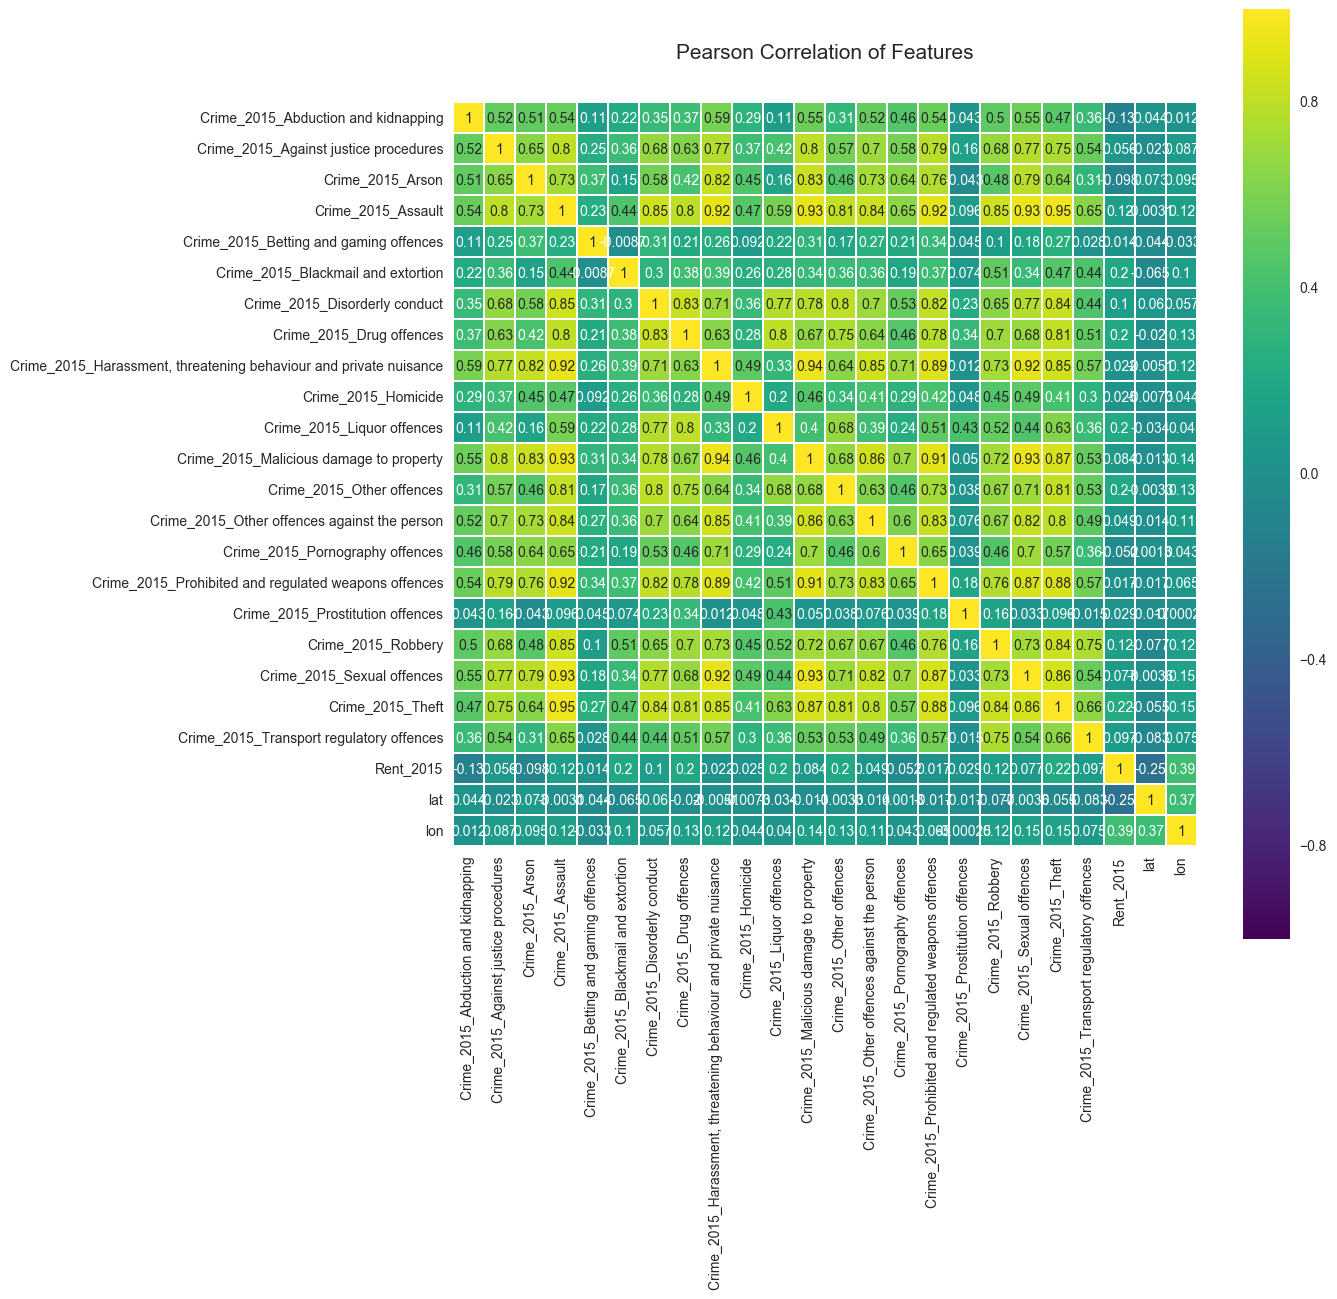

In [44]:
import seaborn as sns
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(Rent_vs_Crime2015.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

# Running Regressors

In [45]:
Rent_vs_Crime2014.columns.unique()

array(['Crime_2014_Abduction and kidnapping',
       'Crime_2014_Against justice procedures', 'Crime_2014_Arson',
       'Crime_2014_Assault', 'Crime_2014_Betting and gaming offences',
       'Crime_2014_Blackmail and extortion',
       'Crime_2014_Disorderly conduct', 'Crime_2014_Drug offences',
       'Crime_2014_Harassment, threatening behaviour and private nuisance',
       'Crime_2014_Homicide', 'Crime_2014_Liquor offences',
       'Crime_2014_Malicious damage to property',
       'Crime_2014_Other offences',
       'Crime_2014_Other offences against the person',
       'Crime_2014_Pornography offences',
       'Crime_2014_Prohibited and regulated weapons offences',
       'Crime_2014_Prostitution offences', 'Crime_2014_Robbery',
       'Crime_2014_Sexual offences', 'Crime_2014_Theft',
       'Crime_2014_Transport regulatory offences', 'Rent_2014', 'lat',
       'lon'], dtype=object)

In [46]:
import sklearn.tree

In [47]:
dtc = sklearn.tree.DecisionTreeRegressor(max_depth=10)

In [48]:
X = Rent_vs_Crime2014[['Crime_2014_Abduction and kidnapping',
       'Crime_2014_Against justice procedures', 'Crime_2014_Arson',
       'Crime_2014_Assault', 'Crime_2014_Betting and gaming offences',
       'Crime_2014_Blackmail and extortion',
       'Crime_2014_Disorderly conduct', 'Crime_2014_Drug offences',
       'Crime_2014_Harassment, threatening behaviour and private nuisance',
       'Crime_2014_Homicide', 'Crime_2014_Liquor offences',
       'Crime_2014_Malicious damage to property',
       'Crime_2014_Other offences',
       'Crime_2014_Other offences against the person',
       'Crime_2014_Pornography offences',
       'Crime_2014_Prohibited and regulated weapons offences',
       'Crime_2014_Prostitution offences', 'Crime_2014_Robbery',
       'Crime_2014_Sexual offences', 'Crime_2014_Theft',
       'Crime_2014_Transport regulatory offences','lat',
       'lon']]
y = Rent_vs_Crime2014.Rent_2014
dtc.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [49]:
dtc.feature_importances_



array([  7.70182251e-04,   5.87893850e-03,   7.40871354e-02,
         2.85523659e-03,   2.65593920e-03,   0.00000000e+00,
         4.64199592e-03,   2.88300430e-02,   2.10121487e-02,
         2.01337585e-02,   1.70907264e-02,   2.46735104e-02,
         3.78537818e-02,   2.13188865e-03,   2.29743096e-04,
         1.54970525e-02,   1.92617381e-02,   1.39708304e-02,
         1.08143770e-02,   4.40916640e-02,   1.61171253e-02,
         2.75406826e-01,   3.61995358e-01])

In [50]:
features = X.columns
feature_importances = dtc.feature_importances_

features_df = pandas.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head()


Features  Importance Score
22                        lon          0.361995
21                        lat          0.275407
2            Crime_2014_Arson          0.074087
19           Crime_2014_Theft          0.044092
12  Crime_2014_Other offences          0.037854

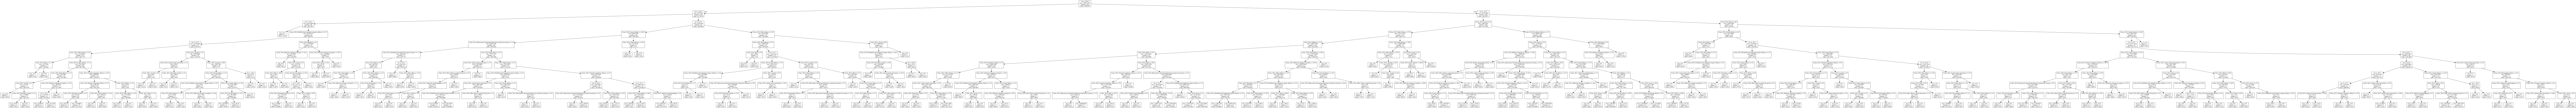

In [51]:
try:
 from StringIO import StringIO
except ImportError:
 from io import StringIO
import sklearn.tree
import IPython.display
import pydot
File_obj = StringIO()
sklearn.tree.export_graphviz(dtc, out_file=File_obj, feature_names=['Crime_2014_Abduction and kidnapping',
       'Crime_2014_Against justice procedures', 'Crime_2014_Arson',
       'Crime_2014_Assault', 'Crime_2014_Betting and gaming offences',
       'Crime_2014_Blackmail and extortion',
       'Crime_2014_Disorderly conduct', 'Crime_2014_Drug offences',
       'Crime_2014_Harassment, threatening behaviour and private nuisance',
       'Crime_2014_Homicide', 'Crime_2014_Liquor offences',
       'Crime_2014_Malicious damage to property',
       'Crime_2014_Other offences',
       'Crime_2014_Other offences against the person',
       'Crime_2014_Pornography offences',
       'Crime_2014_Prohibited and regulated weapons offences',
       'Crime_2014_Prostitution offences', 'Crime_2014_Robbery',
       'Crime_2014_Sexual offences', 'Crime_2014_Theft',
       'Crime_2014_Transport regulatory offences','lat',
       'lon'])
Graph = pydot.graph_from_dot_data(File_obj.getvalue())
IPython.display.Image(Graph.create_png())

In [52]:
import sklearn.grid_search
brute_force = sklearn.grid_search.GridSearchCV(
    sklearn.tree.DecisionTreeRegressor(),
    param_grid = {
        'max_depth': [1,2,3,4,5,6,7,8,9,10,20]
        
        
    },
    cv=10
    )
brute_force.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [53]:
brute_force.best_params_



{'max_depth': 2}

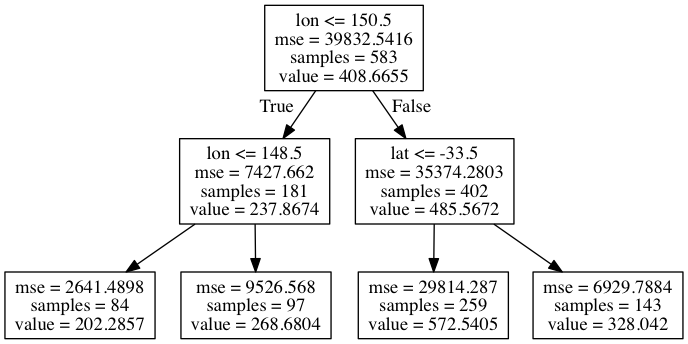

In [54]:
File_obj = StringIO()
sklearn.tree.export_graphviz(brute_force.best_estimator_, 
                             out_file=File_obj, feature_names=['Crime_2014_Abduction and kidnapping',
       'Crime_2014_Against justice procedures', 'Crime_2014_Arson',
       'Crime_2014_Assault', 'Crime_2014_Betting and gaming offences',
       'Crime_2014_Blackmail and extortion',
       'Crime_2014_Disorderly conduct', 'Crime_2014_Drug offences',
       'Crime_2014_Harassment, threatening behaviour and private nuisance',
       'Crime_2014_Homicide', 'Crime_2014_Liquor offences',
       'Crime_2014_Malicious damage to property',
       'Crime_2014_Other offences',
       'Crime_2014_Other offences against the person',
       'Crime_2014_Pornography offences',
       'Crime_2014_Prohibited and regulated weapons offences',
       'Crime_2014_Prostitution offences', 'Crime_2014_Robbery',
       'Crime_2014_Sexual offences', 'Crime_2014_Theft',
       'Crime_2014_Transport regulatory offences','lat',
       'lon'])
Graph = pydot.graph_from_dot_data(File_obj.getvalue())
IPython.display.Image(Graph.create_png())

In [55]:

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 50,min_samples_split=20)
    
model.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=20, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [56]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pandas.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head()

Features  Importance Score
22                        lon          0.409427
21                        lat          0.290368
2            Crime_2014_Arson          0.077010
19           Crime_2014_Theft          0.027274
12  Crime_2014_Other offences          0.027215

In [57]:
import sklearn.ensemble

In [58]:
brute_force = sklearn.grid_search.GridSearchCV(
sklearn.ensemble.RandomForestRegressor(),
    param_grid = {
    'n_estimators' :[1,5,10,20,30,40],
   'max_depth':[2,5,10,20],
    'max_features':[2,3,4]
        
        }
)

In [59]:
brute_force.fit(X,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 5, 10, 20, 30, 40], 'max_features': [2, 3, 4], 'max_depth': [2, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [60]:
brute_force.best_params_

{'max_depth': 10, 'max_features': 4, 'n_estimators': 40}

## This score seems wierd

In [61]:
brute_force.best_score_

-0.63484817120417747

# Running Classifiers ( found code in Kaggle )

In [62]:
# Load in our libraries
import pandas as pd
import numpy as np
import re
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Going to use these 5 base models for the stacking
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import KFold;

In [63]:
# Some useful parameters which will come in handy later on
ntrain = Rent_vs_Crime2015.shape[0]
ntest = Rent_vs_Crime2014.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold(ntrain, n_folds= NFOLDS, random_state=SEED)

# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)
    
# Class to extend XGboost classifer

In [64]:
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [65]:
# Put in our parameters for said classifiers
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':500,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}

# AdaBoost parameters
ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.75
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 500,
     #'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}

# Support Vector Classifier parameters 
svc_params = {
    'kernel' : 'linear',
    'C' : 0.025
    }

In [66]:

# Create 5 objects that represent our 4 models
rf = SklearnHelper(clf=RandomForestClassifier, seed=SEED, params=rf_params)
et = SklearnHelper(clf=ExtraTreesClassifier, seed=SEED, params=et_params)
ada = SklearnHelper(clf=AdaBoostClassifier, seed=SEED, params=ada_params)
gb = SklearnHelper(clf=GradientBoostingClassifier, seed=SEED, params=gb_params)
svc = SklearnHelper(clf=SVC, seed=SEED, params=svc_params)

In [67]:
# Create Numpy arrays of train, test and target ( Survived) dataframes to feed into our models
y_train = Rent_vs_Crime2014['Rent_2014'].ravel()
train = Rent_vs_Crime2014.drop(['Rent_2014'], axis=1)
x_train = Rent_vs_Crime2014.values # Creates an array of the train data
x_test = Rent_vs_Crime2014.values # Creats an array of the test data

In [68]:
# Create our OOF train and test predictions. These base results will be used as new features
et_oof_train, et_oof_test = get_oof(et, x_train, y_train, x_test) # Extra Trees
rf_oof_train, rf_oof_test = get_oof(rf,x_train, y_train, x_test) # Random Forest
ada_oof_train, ada_oof_test = get_oof(ada, x_train, y_train, x_test) # AdaBoost 
gb_oof_train, gb_oof_test = get_oof(gb,x_train, y_train, x_test) # Gradient Boost
svc_oof_train, svc_oof_test = get_oof(svc,x_train, y_train, x_test) # Support Vector Classifier

print("Training is complete")

/Users/nerenevaz/anaconda/lib/python2.7/site-packages/sklearn/ensemble/forest.py:267: UserWarning:

Warm-start fitting without increasing n_estimators does not fit new trees.



Training is complete


In [69]:
rf_feature = rf.feature_importances(x_train,y_train)
et_feature = et.feature_importances(x_train, y_train)
ada_feature = ada.feature_importances(x_train, y_train)
gb_feature = gb.feature_importances(x_train,y_train)

[ 0.01524029  0.045788    0.04323886  0.05311204  0.01518141  0.01061229
  0.04257702  0.05876775  0.05142752  0.00934248  0.04036366  0.0566868
  0.05141296  0.02296489  0.02195653  0.04682066  0.00345652  0.02686584
  0.04297978  0.06600808  0.0378427   0.14678179  0.03917172  0.05140045]
[ 0.03692473  0.0398309   0.04344747  0.0477344   0.01526518  0.02640568
  0.03660737  0.03883007  0.04313051  0.02740248  0.03438185  0.05128459
  0.03957139  0.04136521  0.04153817  0.04659288  0.02969495  0.04525271
  0.05059678  0.04618199  0.04423341  0.08945441  0.0404887   0.04378416]
[ 0.     0.     0.042  0.     0.     0.002  0.     0.044  0.     0.     0.036
  0.     0.     0.     0.044  0.     0.     0.     0.004  0.002  0.044
  0.782  0.     0.   ]
[ 0.00711566  0.01235625  0.00903466  0.01037115  0.0050159   0.00455114
  0.01061446  0.01127172  0.00526496  0.00498551  0.0053813   0.01590793
  0.01309467  0.00273413  0.00623458  0.01419329  0.00443931  0.00302846
  0.01110229  0.01354217

In [74]:
rf_features = [ 0.01524029 , 0.045788 ,   0.04323886,  0.05311204 , 0.01518141 , 0.01061229,
  0.04257702,  0.05876775 , 0.05142752 , 0.00934248  ,0.04036366 , 0.0566868,
  0.05141296,  0.02296489  ,0.02195653  ,0.04682066  ,0.00345652 , 0.02686584,
  0.04297978,  0.06600808  ,0.0378427   ,0.14678179  ,0.03917172 , 0.05140045]
et_features = [ 0.03692473 , 0.0398309  , 0.04344747 , 0.0477344 ,  0.01526518,  0.02640568,
  0.03660737 , 0.03883007  ,0.04313051  ,0.02740248 , 0.03438185 , 0.05128459,
  0.03957139 , 0.04136521  ,0.04153817  ,0.04659288 , 0.02969495 , 0.04525271,
  0.05059678 , 0.04618199  ,0.04423341  ,0.08945441 , 0.0404887  , 0.04378416]
ada_features = [ 0.   ,  0. ,    0.042 , 0. ,    0. ,    0.002,  0.   ,  0.044 , 0. ,    0.,     0.036,
  0.  ,   0.  ,   0.,     0.044 , 0. ,    0.  ,   0.  ,   0.004 , 0.002 , 0.044,
  0.782,  0.,     0.   ]
gb_features = [ 0.00711566  ,0.01235625 , 0.00903466 , 0.01037115,  0.0050159,   0.00455114,
  0.01061446 , 0.01127172 , 0.00526496 , 0.00498551 , 0.0053813 ,  0.01590793,
  0.01309467 , 0.00273413 , 0.00623458 , 0.01419329 , 0.00443931 , 0.00302846,
  0.01110229  ,0.01354217 , 0.01125064 , 0.02258911 , 0.00860306 , 0.00194738]

In [76]:
cols = Rent_vs_Crime2014.columns.values
# Create a dataframe with features
feature_dataframe = pd.DataFrame( {'features': cols,
     'Random Forest feature importances': rf_features,
     'Extra Trees  feature importances': et_features,
      'AdaBoost feature importances': ada_features,
    'Gradient Boost feature importances': gb_features
    })
feature_dataframe

AdaBoost feature importances  Extra Trees  feature importances  \
0                          0.000                          0.036925   
1                          0.000                          0.039831   
2                          0.042                          0.043447   
3                          0.000                          0.047734   
4                          0.000                          0.015265   
5                          0.002                          0.026406   
6                          0.000                          0.036607   
7                          0.044                          0.038830   
8                          0.000                          0.043131   
9                          0.000                          0.027402   
10                         0.036                          0.034382   
11                         0.000                          0.051285   
12                         0.000                          0.039571   
13                         0.000                          0.041365   
14                         0.044                          0.041538   
15                         0.000                          0.046593   
16                         0.000                          0.029695   
17                         0.000                          0.045253   
18                         0.004                          0.050597   
19                         0.002                          0.046182   
20                         0.044                          0.044233   
21                         0.782                          0.089454   
22                         0.000                          0.040489   
23                         0.000                          0.043784   

    Gradient Boost feature importances  Random Forest feature importances  \
0                             0.007116                           0.015240   
1                             0.012356                           0.045788   
2                             0.009035                           0.043239   
3                             0.010371                           0.053112   
4                             0.005016                           0.015181   
5                             0.004551                           0.010612   
6                             0.010614                           0.042577   
7                             0.011272                           0.058768   
8                             0.005265                           0.051428   
9                             0.004986                           0.009342   
10                            0.005381                           0.040364   
11                            0.015908                           0.056687   
12                            0.013095                           0.051413   
13                            0.002734                           0.022965   
14                            0.006235                           0.021957   
15                            0.014193                           0.046821   
16                            0.004439                           0.003457   
17                            0.003028                           0.026866   
18                            0.011102                           0.042980   
19                            0.013542                           0.066008   
20                            0.011251                           0.037843   
21                            0.022589                           0.146782   
22                            0.008603                           0.039172   
23                            0.001947                           0.051400   

                                             features  
0                 Crime_2014_Abduction and kidnapping  
1               Crime_2014_Against justice procedures  
2                                    Crime_2014_Arson  
3                                  Crime_2014_Assault  
4              Crime_2014_Betting and gaming of

In [77]:
# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['Random Forest feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Random Forest feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['Extra Trees  feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Extra Trees  feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Extra Trees Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['AdaBoost feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['AdaBoost feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'AdaBoost Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['Gradient Boost feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Gradient Boost feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [79]:

feature_dataframe['mean'] = feature_dataframe.mean(axis= 1) # axis = 1 computes the mean row-wise
feature_dataframe

AdaBoost feature importances  Extra Trees  feature importances  \
0                          0.000                          0.036925   
1                          0.000                          0.039831   
2                          0.042                          0.043447   
3                          0.000                          0.047734   
4                          0.000                          0.015265   
5                          0.002                          0.026406   
6                          0.000                          0.036607   
7                          0.044                          0.038830   
8                          0.000                          0.043131   
9                          0.000                          0.027402   
10                         0.036                          0.034382   
11                         0.000                          0.051285   
12                         0.000                          0.039571   
13                         0.000                          0.041365   
14                         0.044                          0.041538   
15                         0.000                          0.046593   
16                         0.000                          0.029695   
17                         0.000                          0.045253   
18                         0.004                          0.050597   
19                         0.002                          0.046182   
20                         0.044                          0.044233   
21                         0.782                          0.089454   
22                         0.000                          0.040489   
23                         0.000                          0.043784   

    Gradient Boost feature importances  Random Forest feature importances  \
0                             0.007116                           0.015240   
1                             0.012356                           0.045788   
2                             0.009035                           0.043239   
3                             0.010371                           0.053112   
4                             0.005016                           0.015181   
5                             0.004551                           0.010612   
6                             0.010614                           0.042577   
7                             0.011272                           0.058768   
8                             0.005265                           0.051428   
9                             0.004986                           0.009342   
10                            0.005381                           0.040364   
11                            0.015908                           0.056687   
12                            0.013095                           0.051413   
13                            0.002734                           0.022965   
14                            0.006235                           0.021957   
15                            0.014193                           0.046821   
16                            0.004439                           0.003457   
17                            0.003028                           0.026866   
18                            0.011102                           0.042980   
19                            0.013542                           0.066008   
20                            0.011251                           0.037843   
21                            0.022589                           0.146782   
22                            0.008603                           0.039172   
23                            0.001947                           0.051400   

                                             features      mean  
0                 Crime_2014_Abduction and kidnapping  0.014820  
1               Crime_2014_Against justice procedures  0.024494  
2                                    Crime_2014_Arson  0.034430  
3                                  Crime_2014_Assault  0.027804

In [80]:
y = feature_dataframe['mean'].values
x = feature_dataframe['features'].values
data = [go.Bar(
            x= x,
             y= y,
            width = 0.5,
            marker=dict(
               color = feature_dataframe['mean'].values,
            colorscale='Portland',
            showscale=True,
            reversescale = False
            ),
            opacity=0.6
        )]

layout= go.Layout(
    autosize= True,
    title= 'Barplots of Mean Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bar-direct-labels')

In [81]:
y = feature_dataframe['mean'].values
x = feature_dataframe['features'].values
data = [go.Bar(
            x= x,
             y= y,
            width = 0.5,
            marker=dict(
               color = feature_dataframe['mean'].values,
            colorscale='Portland',
            showscale=True,
            reversescale = False
            ),
            opacity=0.6
        )]

layout= go.Layout(
    autosize= True,
    title= 'Barplots of Mean Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bar-direct-labels')